# LINEAR REGRESSION

In this notebook we are going to explain the principal characterisitcs of linear regression.

First of all, linear regression is an algoritm used in machine learning. Specifically, it follows inside the "supervised learning". 

# Database and language

For this notebook we are going to use the database "red wine quiality". You can follow the entery description follow this link https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009.

* All the variable in this database are quantitative.
* The target variable is "quiality". This variable range between 0 and 10.

The code of the following lines is developed with python.

We are going to import the libraries required to all the futures steps.

In [1]:
import pandas as pd                                  # Read csv
from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # interaction effect, no linear models
from sklearn.linear_model  import Ridge, RidgeCV, Lasso, LassoCV # regularizationy, best value of alpha Ridge, reduce features, best value of alpha Lasso
from sklearn.preprocessing import StandardScaler # standardization
import matplotlib.pyplot as plt                  # plot
import numpy as np


Now, we are going to upload the data. As we can see, there are 12 variables: 11 features and 1 target. There are 1,599 rows

In [2]:
# read csv
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
print("Number of rows:", len(df))
print(df.head())

Number of rows: 1599
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  

 Now we are going to split the data into training and test. 
 
 df_train. Has 

In [3]:
# Split data into two df one with 80% of data and other with 20%
df_train = df.sample(frac=0.8, random_state=200)
df_train_target = df_train['quality']
df_train_features = df_train.drop('quality', axis=1)

df_test = df.drop(df_train.index)

print("df_train has", len(df_train), "cases and", df_train.shape[1], "columns")
print("df_train_target has", len(df_train_target), "cases and only has one columns (target)")
print("df_train_features has", len(df_train_features), df_train_features.shape[1], "columns that are equal to the number of features")

print("df_test has", len(df_test), "cases and", df_test.shape[1], "columns")

print("If we add the number of cases in train,", len(df_train), ",plus the number of cases in test,", len(df_test), ", we obtain the total len of the original data", len(df_train) + len(df_test))

df_train has 1279 cases and 12 columns
df_train_target has 1279 cases and only has one columns (target)
df_train_features has 1279 11 columns that are equal to the number of features
df_test has 320 cases and 12 columns
If we add the number of cases in train, 1279 ,plus the number of cases in test, 320 , we obtain the total len of the original data 1599


# Introduction

The aim of linear regression algorithm is to predict one variable (VD, also know as target) using one or more features (VI).

There are two type of models depending on the number of features involve:

* Simple Linear Regression. Only one Feature is used to predict the target:

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \epsilon
$$

* Multiple Linear Regression. Two or more features are used to predict the target.

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 +  \hat{\beta}_2 x_2 + ... + \hat{\beta}_n x_n + \epsilon
$$

Where:

* $ \hat{y} $: Is the target we predict.
* $ \hat{\beta}_0 $: Is the intercept or bias.
* $ \hat{\beta}_1, \hat{\beta}_2, ... $: Are the coefficients (weights, effect) associated with each feature. Is the effect of one feature in the target.
* $ \epsilon $: Is the error

We assume that the relation between VD and the VI is linear.

### Compute our first simple linear regression model

We are going to use trainig data. As we said, our target variable is "quality" (stored in df_train_target). To predict the value we are going to use as feature "alcohol" (stored in df_train_features with the other features).

In [4]:
# Select only the feature alcohol
df_train_feature_alcohol = df_train[['alcohol']]

# Print results
print("Target quality \n", df_train_target, "\n")
print("Feature alcohol \n", df_train_feature_alcohol)

Target quality 
 366     7
1325    6
133     6
1418    5
1258    6
       ..
1514    6
1027    5
732     5
1282    6
801     5
Name: quality, Length: 1279, dtype: int64 

Feature alcohol 
         alcohol
366   10.000000
1325  10.600000
133    9.800000
1418   9.800000
1258  11.300000
...         ...
1514   9.233333
1027  11.600000
732    9.600000
1282  10.900000
801   10.000000

[1279 rows x 1 columns]


Now we create the model that put in relation quality and alcohol. Steps:

* Create the model.
* Fit the model We obtain the coefficients and the intercept here.
* Show the values for intercept and coefficients

In [5]:
# Create SLRM and fit it
regression1 = LinearRegression()

# Fit the model
model1 = regression1.fit(df_train_feature_alcohol, df_train_target) # Features first then target

# Show the equation values:
print("Intercept :", model1.intercept_ )
print("Coefficients :", model1.coef_)

Intercept : 1.8296508402667544
Coefficients : [0.36431398]


Whith this information we can build the equation of the model:

$$
\hat{y} = 1.830 + 0.364 · x_1 + \epsilon
$$

The error $ \epsilon $ is the difference between the real value of $ y $ and the predicted value $ \hat{y} $. We only can know that value when we have the real result but not when we predict.

However, we can replace the feature value in the equation. For our first case this value is:

In [6]:
print("Value of alcohol feature for our first case :", df_train_feature_alcohol.iloc[0:1])

Value of alcohol feature for our first case :      alcohol
366     10.0


So, the equation for the first case is:

$$
\hat{y} = 1.830 + 0.364 · 10 
$$

So the quality predicted value of our firsy case is:

$$
\hat{y} = 1.830 + 0.364 · 10 \approx 5.473
$$

We can do this using our script:

In [7]:
print("Quality predicted value for the frst case:", model1.predict(df_train_feature_alcohol.iloc[0:1]))

Quality predicted value for the frst case: [5.47279063]


Now, we are going to plot our model. This graphics shows the relation between real values of alcohol (x-exe) and real quality (y-exes). The red line represents the fitted linear regression model. More close the dots to the line, better predictions we made.

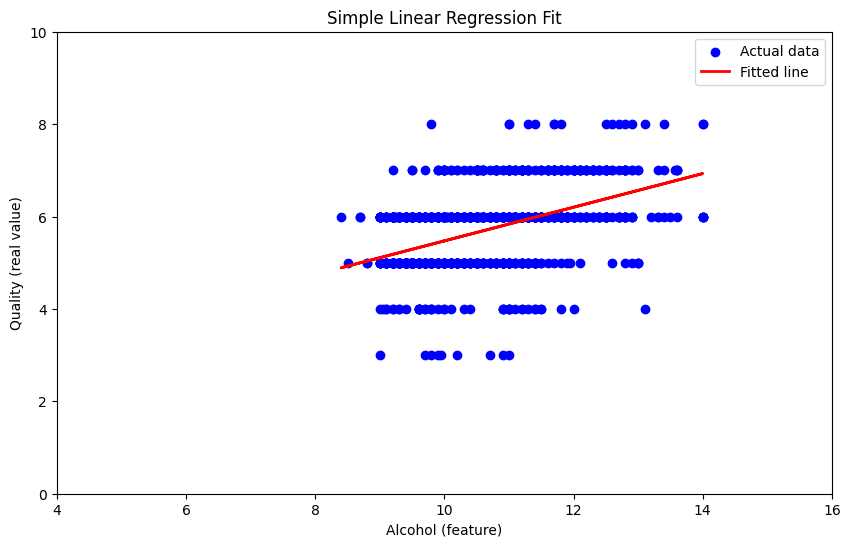

In [8]:
# Plotting the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(df_train_feature_alcohol, df_train_target, color='blue', label='Actual data')

# Plotting the regression line
plt.plot(df_train_feature_alcohol, model1.predict(df_train_feature_alcohol), color='red', linewidth=2, label='Fitted line')

# Limits of the axes
plt.xlim(4, 16)
plt.ylim(0, 10)

# Adding labels and title
plt.ylabel('Quality (real value)')
plt.xlabel('Alcohol (feature)')
plt.title('Simple Linear Regression Fit')
plt.legend()

This is what we can conclude only with the plot:

* Dots follow the vertical. This indicated that the alcohol is not the unique variable that could explain the quality of the wine.
* The prediction line increase. We could translate this as "more alcohol, more quality of the wine".
* Dots are not very close to the line what means that probably there are other factor that are affecting in the quality.

### Compute our first multiple linear regression model

In this case, we are going to include all the features that we have to predict the quality (target). The steps are as in the simple model.

In [9]:
# Create MLRM and fit it
regression2 = LinearRegression()

# Fit the model
model2 = regression2.fit(df_train_features, df_train_target) # Features first then target

# Show the equation values:
print("Intercept :", model2.intercept_ )
print("Coefficients :", model2.coef_)

Intercept : 16.63469349194023
Coefficients : [ 2.03288413e-02 -1.02555421e+00 -1.51014281e-01  1.16167979e-02
 -1.49002597e+00  5.47302465e-03 -3.37647532e-03 -1.23669162e+01
 -5.33610421e-01  8.87103957e-01  2.96795462e-01]


Whith this information we can build the equation of the model:

$$
\hat{y} = 16.635 + 0.020 · x_1 - 1.026 · x_2 - 0.151 · x_3 + 0.012 · x_4 - 1.490 · x_5 + 0.005 · x_6 - 0.003 · x_7 - 12.367 · x_8 - 0.534 · x_9 + 0.887 · x_{10} + 0.298 · x_{11}
$$

We can see that we have negative and positive values in the coeficients. We interpretate as follow:

* **Positive**: A high value in that feature, increase the value of the taarget.
* **Negative**: A high value in that feature, decrease the value of the taarget.

If we replace the features for our first case we obtain this:

In [10]:
print("Value of all features for our first case :", df_train_features.iloc[0:1])

Value of all features for our first case :      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
366           12.8             0.615         0.66             5.8      0.083   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
366                  7.0                  42.0   1.0022  3.07       0.73   

     alcohol  
366     10.0  


For the first case the final equation looks like:

$$
\hat{y} = 16.634 + 0.020 \cdot 12.8 - 1.026 \cdot 0.615 - 0.151 \cdot 0.66 + 0.012 \cdot 5.8 - 1.490 \cdot 0.083 + 0.005 \cdot 7.0 - 0.003 \cdot 42.0 - 12.367 \cdot 1.0022 - 0.534 \cdot 3.07 + 0.887 \cdot 0.73 + 0.298 \cdot 10.0
$$

And the quality predicted value :

$$
\hat{y} \approx 5.608
$$

We can do this using our script:

In [11]:
print("Quality predicted value for the frst case:", model2.predict(df_train_features.iloc[0:1]))

Quality predicted value for the frst case: [5.58795496]


Represent now in a plot

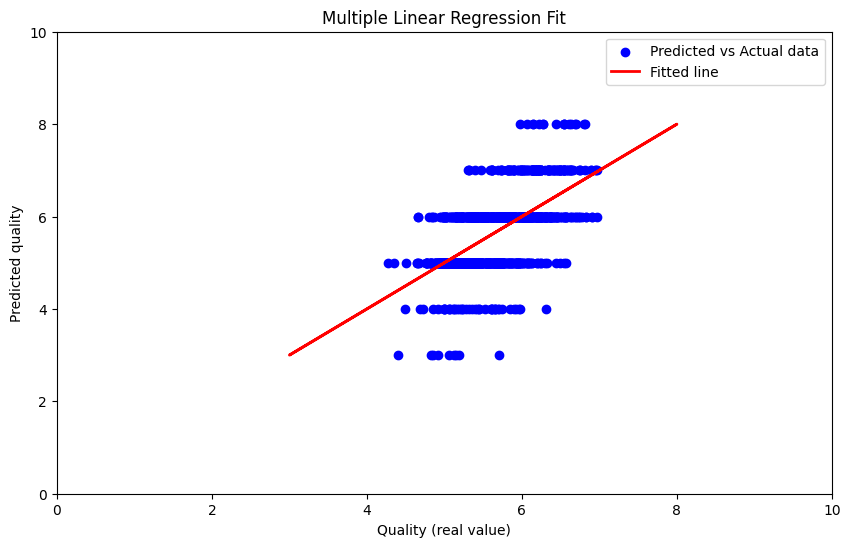

In [12]:
# Plotting the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(model2.predict(df_train_features), df_train_target, color='blue', label='Predicted vs Actual data')

# Plotting the regression line
plt.plot(df_train_target, df_train_target, color='red', linewidth=2, label='Fitted line')

# Limits of the axes
plt.xlim(0, 10)
plt.ylim(0, 10)

# Adding labels and title
plt.xlabel('Quality (real value)')
plt.ylabel('Predicted quality')
plt.title('Multiple Linear Regression Fit')
plt.legend()

# Interacction effect

Some times, features could not show an effect in the target by it selfs, but the combinations of them does. We can include this type of effect including an interaction term in the model. 

Including interaction terms in the model allows for the possibility that the relationship between the predictors and the target variable is not additive ($ \hat{\beta}_1 · x_1 +  \hat{\beta}_2 · x_2 $) but varies depending on the levels of other predictors ($ \hat{\beta}_3 · x_1 · x_2 $).

Imagine we have an original model with two features: x1 and x2. As we see the introduction, the model will take this form:

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \epsilon
$$

If we suspect some interaction between this two features, we can add the interaction effect as follow:

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \hat{\beta}_3 x_1 x_2 + \epsilon
$$

Some relevant things:
* We can include as many interaction effects as we want, if there are interesting. However, think in the relevance for include them because we take the risk of overfitting in our model.
* An interaction effect could include more than two features. For example ($ \hat{\beta}_3 · x_1 · x_2 · x_3 $). If you decide this is interesting in your case, take care about the overfitting and the dificulty of interpreate the interaction.
* It is not necessary include interaction for all the features involve in the model. If we have a model with three features, and we thing only the interaction between $ x_1 $ and $ x_2 $ is ineresting, then we can create a model like this: $ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \hat{\beta}_3 x_3 + \hat{\beta}_4 x_1 x_2 + \epsilon $

The domain knowledge and a visualization that shows the effect in the target using two features could be useful to decide when include an interaction.

We will se how to do this in python.


### Multi-linear regression model all features plus an interaction between two of them

As before, alochol is our target variable. As predictors we include all the feautres plus the interaction between free sulfur dioxide and alochol.

First, we create the interaction:



In [13]:
interaction = PolynomialFeatures(
    degree=2,                    # How many features combinations we want to create
    include_bias=False,          # Exclude the bias term 
    interaction_only=True        # Only include interaction effects (not x^2, x^3, etc.)
    )

Now, we have to transform and fit the interaction between free sulfur dioxide and alcohol:

In [14]:
features_interaction = interaction.fit_transform(df_train_features[['free sulfur dioxide', 'alcohol']])

# This is not necessary but is good to see the results. Transform the array into a dataframe:
features_interaction = pd.DataFrame(features_interaction,
                                      columns = interaction.get_feature_names_out(['free sulfur dioxide', 'alcohol']),
                                      index=df_train_features.index  # This line ensures the index is carried over. Example, index 10 doesn´t should appear
                                   )
print(features_interaction.sort_index().head(20))

    free sulfur dioxide  alcohol  free sulfur dioxide alcohol
1                  25.0      9.8                        245.0
2                  15.0      9.8                        147.0
3                  17.0      9.8                        166.6
4                  11.0      9.4                        103.4
5                  13.0      9.4                        122.2
6                  15.0      9.4                        141.0
7                  15.0     10.0                        150.0
8                   9.0      9.5                         85.5
9                  17.0     10.5                        178.5
11                 17.0     10.5                        178.5
12                 16.0      9.9                        158.4
13                  9.0      9.1                         81.9
14                 52.0      9.2                        478.4
16                 35.0     10.5                        367.5
19                 17.0      9.2                        156.4
20      

As we see, the interaction include the simple features (because degree = 2 includes degree = 1 that are the simple effects) and the interaction. We are only interested in the interaction column (free sulfur dioxide alcohol) so we extract only that column and we add it to our original features df: 

In [15]:
interaction_column = features_interaction[['free sulfur dioxide alcohol']]
print(interaction_column.tail(5))

      free sulfur dioxide alcohol
1514                   147.733333
1027                   324.800000
732                     96.000000
1282                    98.100000
801                     80.000000


We add the interaction column to our original feature df. We are going to create a new df to show that is a modified version.

In [16]:
df_train_features_modified = df_train_features.join(interaction_column, how='outer')
pd.set_option('display.max_rows', 1600) 
print(df_train_features_modified.sort_index().head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  free sulfur dioxide alcohol  
1      9.8                        245.0  
2 

Now, we have a new df with all the original features plus one with the interaction (the last one).

**!!! Important**. We have done this only for train data. In a normal workflow, this step must be done **before** split the df in test and training. In the final example we are going to see a compleate process.

With our final df, features_interaction_modified, we can fit the model and obtain the intercept and coefficients:

In [17]:
# Create MLRM and fit it
regression3 = LinearRegression()

# Fit the model
model3 = regression3.fit(df_train_features_modified, df_train_target) # Features first then target

# Show the equation values:
print("Intercept :", model3.intercept_ )

# New way to obtain the coefficients with names and round them to three decimals:
feature_names = df_train_features_modified.columns
coefficient_dict = dict(zip(feature_names, model3.coef_))
print("Coefficients :")
for feature, coef in coefficient_dict.items():
    print(f"{feature}: {coef:.3f}")

Intercept : -19.911852177471186
Coefficients :
fixed acidity: -0.013
volatile acidity: -0.239
citric acid: 0.199
residual sugar: -0.022
chlorides: 0.454
free sulfur dioxide: 0.007
total sulfur dioxide: 0.001
density: 24.904
pH: 0.136
sulphates: -0.257
alcohol: 0.054
free sulfur dioxide alcohol: -0.000


Now build the equation of the model:

$$
\hat{y} = 19.912 -0.013 · x_1 - 0.239 · x_2 + 0.0199 · x_3 - 0.022 · x_4 + 0.454 · x_5 + 0.007 · x_6 + 0.001 · x_7 + 24.904 · x_8 + 0.136 · x_9 - 0.257 · x_{10} + 0.054 · x_{11} - 0.0005 · x_{6} · x_{11}
$$

As we see, the interaction coefficient is negative. It means that when we have higher levels of alcohol, the effect of free sulfur dioxide in the quality is less positive or negative. However, as we see, the size of the coefficients is ver low.

If we replace the features for our first case we obtain this:

In [18]:
# Notice that we use df_train_features_modified
print("Value of all features for our first case :", df_train_features_modified.iloc[0:1]) 

Value of all features for our first case :    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
1                 25.0                  67.0   0.9968  3.2       0.68   

   alcohol  free sulfur dioxide alcohol  
1      9.8                        245.0  
